# Hack Western - X-ray

In [110]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore")
import shutil
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
import pickle
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator,array_to_img
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import Model, load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

__Split data into train, test and val__

In [47]:
import splitfolders
splitfolders.ratio('Xray - TB Pnemonia COVID/dataset', output="Xray - TB Pnemonia COVID/train-test-val_datasets", seed=123, ratio=(.8, 0.1, 0.1))

Copying files: 784 files [00:01, 489.97 files/s]


__Data Augmentation__

In [49]:
image_dimension = 224
batch_size = 32

# Creating training, validation, and test image flows
train_gen = ImageDataGenerator(rescale = 1/255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               width_shift_range= 0.2,
                               height_shift_range=0.2,
                               rotation_range=0.3,
                               horizontal_flip = True)



test_gen = ImageDataGenerator(rescale = 1/255)


##############################################################################

train_set = train_gen.flow_from_directory('Xray - TB Pnemonia COVID/train-test-val_datasets/train',
                                          target_size = (image_dimension,image_dimension), 
                                          batch_size = batch_size,
                                          class_mode = 'categorical')


val_gen = test_gen.flow_from_directory('Xray - TB Pnemonia COVID/train-test-val_datasets/val',
                                      target_size = (image_dimension,image_dimension),
                                      batch_size = batch_size,
                                      class_mode = 'categorical')



test_set = test_gen.flow_from_directory('Xray - TB Pnemonia COVID/train-test-val_datasets/test',
                                        target_size = (image_dimension,image_dimension),
                                        batch_size = batch_size,
                                        class_mode = 'categorical',
                                        shuffle=False)

Found 624 images belonging to 4 classes.
Found 76 images belonging to 4 classes.
Found 84 images belonging to 4 classes.


Dictionary values from the upcoming model:

In [50]:
train_set.class_indices

{'Covid-19': 0, 'Normal': 1, 'Pneumonia': 2, 'Tuberculosis': 3}

### Modeling

In [51]:
CNN_model = Sequential()

CNN_model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3))) #firstlayer
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu',input_shape=(64,64,3))) 
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(layers.Conv2D(64, (6, 6), activation='relu',input_shape=(64,64,3))) 
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(layers.Conv2D(64, (6, 6), activation='relu',padding="same",input_shape=(64,64,3))) 
CNN_model.add(layers.MaxPooling2D((2, 2)))
CNN_model.add(Dropout(0.25))
CNN_model.add(layers.Flatten())
CNN_model.add(Dense(64,activation="relu"))
CNN_model.add(Dropout(0.5))
CNN_model.add(Dense(4,activation="softmax"))
CNN_model.compile(loss=keras.losses.categorical_crossentropy,optimizer = "adam",metrics=["accuracy"])
CNN_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 49, 49, 64)      

In [111]:
epochs = 50
batch_size = 32
num_of_train_samples = 624 
num_of_val_samples = 76

CNNmodel = CNN_model.fit_generator(
    train_set,
    steps_per_epoch = num_of_train_samples / batch_size,
    epochs = epochs,
    validation_data = val_gen,
    validation_steps = num_of_val_samples / batch_size
)

Epoch 1/50
19/19 [==============================] - 16s 783ms/step - loss: 0.5503 - accuracy: 0.7965 - val_loss: 0.4654 - val_accuracy: 0.8289
Epoch 2/50
19/19 [==============================] - 15s 751ms/step - loss: 0.4889 - accuracy: 0.8189 - val_loss: 0.6106 - val_accuracy: 0.7500
Epoch 3/50
19/19 [==============================] - 14s 714ms/step - loss: 0.5890 - accuracy: 0.7821 - val_loss: 0.5135 - val_accuracy: 0.8289
Epoch 4/50
19/19 [==============================] - 15s 753ms/step - loss: 0.5337 - accuracy: 0.7965 - val_loss: 0.3821 - val_accuracy: 0.8421
Epoch 5/50
19/19 [==============================] - 14s 737ms/step - loss: 0.4825 - accuracy: 0.8093 - val_loss: 0.3669 - val_accuracy: 0.8289
Epoch 6/50
19/19 [==============================] - 14s 722ms/step - loss: 0.4626 - accuracy: 0.8462 - val_loss: 0.3848 - val_accuracy: 0.8158
Epoch 7/50
19/19 [==============================] - 14s 759ms/step - loss: 0.5631 - accuracy: 0.7965 - val_loss: 0.4615 - val_accuracy: 0.8026

In [112]:
CNN_model.save('CNN_model_xray.h5')

In [113]:
score = CNN_model.evaluate(test_set, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

3/3 [==============================] - 1s 172ms/step - loss: 0.3304 - accuracy: 0.8571
Test loss: 0.3304423391819
Test accuracy: 0.8571428656578064


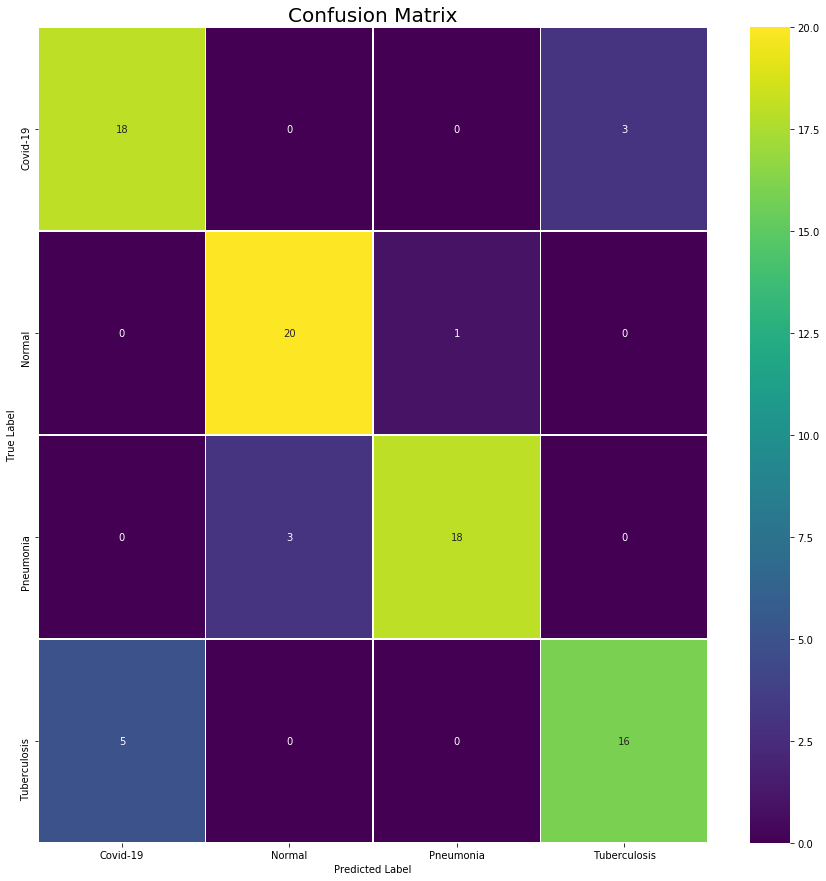

In [114]:
conf_mat=confusion_matrix(y_true=test_set.classes[test_set.index_array], y_pred=np.argmax(CNN_model.predict(test_set), axis=1))

plt.figure(figsize = (15,15))
x_axis_labels = ['Covid-19', 'Normal', 'Pneumonia', 'Tuberculosis']
y_axis_labels =  ['Covid-19', 'Normal', 'Pneumonia', 'Tuberculosis']
sns.heatmap(conf_mat,annot=True,cbar=True,cmap="viridis",linewidths=0.7, xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.title('Confusion Matrix',size = 20)
plt.xlabel("Predicted Label", size = 10)
plt.ylabel("True Label", size = 10)
plt.show()

In [115]:
target_names = list(train_set.class_indices.keys())
trueClass=test_set.classes[test_set.index_array]
predictedClass=np.argmax(CNN_model.predict(test_set), axis=1)

In [116]:
print(classification_report(trueClass, predictedClass, target_names=target_names))

              precision    recall  f1-score   support

    Covid-19       0.78      0.86      0.82        21
      Normal       0.87      0.95      0.91        21
   Pneumonia       0.95      0.86      0.90        21
Tuberculosis       0.84      0.76      0.80        21

    accuracy                           0.86        84
   macro avg       0.86      0.86      0.86        84
weighted avg       0.86      0.86      0.86        84

